# 1.2 Sample ACF and Properties of AR(1) Model

This lesson defines the sample autocorrelation function (ACF) in general and derives the pattern of the ACF for an AR(1) model. Recall from Lesson 1.1 that an AR(1) model is a linear model that predicts the present value of a time series using the immediately prior value in time.

Let's import the Python modules we'll be using before beginning.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")

/vagrant/environs/sklearn/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Let's also define some $\LaTeX$ macros for easier typesetting.
$\DeclareMathOperator{\E}{E}$
$\DeclareMathOperator{\var}{var}$
$\DeclareMathOperator{\cov}{cov}$
$\DeclareMathOperator{\corr}{corr}$

## Measures of Dependence
We now discuss various measures that describe the general behavior of a process as it evolves over time. A rather simple descriptive measure is the mean function.

### Definition
The **mean function** is defined as

\begin{equation*}
    \mu_{xt} = \E(x_t)
\end{equation*}

provided it exists, where $\E$ denotes the usual expected value operator. When no confusion exists about which time series we are referring to, we will drop a subscript and write $\mu_{x t}$ as $\mu_t$.

### Definition
The **autocovariance function** is defined as the second moment product

\begin{equation*}
    \gamma_x(s, t) = \cov(x_s, x_t) = \E[(x_s - \mu_s)(x_t - \mu_t)],
\end{equation*}

for all $s$ and $t$. When no possible confusion exists about which time series we are referring to, we will drop the subscript and write $\gamma_x(s, t)$ as $\gamma(s, t)$.

Note that $\gamma_x(s, t) = \gamma_x(t, x)$ for all time points $s$ and $t$. The autocovariance measures *linear* dependence between two points on the same series observed at different times. Recall from classical statistics that if $\gamma_x(s, t) = 0$, then $x_s$ and $x_t$ are not linear related, but there still may be some dependence structure between them. If, however, $x_s$ and $x_t$ are bivariate normal, $\gamma_x(s, t) = 0$ ensures their independence. It is clear that for $s = t$ the autocovariance reduces to the variance, because

\begin{equation*}
    \gamma_x(t, t) = \E[(x_t - \mu_t)^2] = \var(x_t).
\end{equation*}

As in classical statistics, it is more convenient to deal with a measure of association between $-1$ and $1$, and this leads to the following definition.

### Definition
The **autocorrelation function (ACF)** is defined as

\begin{equation*}
    \rho(s, t) = \frac{\gamma(s, t)}{\sqrt{\gamma(s, s) \gamma(t, t)}}.
\end{equation*}

The ACF measures the linear predictability of the series at time $t$, say $x_t$, using only the value $x_s$. We can show easily that $-1 \leq \rho(s, t) \leq 1$ using the Cauchy-Schwarz inequality. If we can predict $x_t$ *perfectly* from $x_s$ through a linear relationship $x_t = \beta_0 + \beta_1 x_s$, then the correlation will be $+1$ when $\beta_1 > 0$ and $-1$ when $\beta_1 < 0$.

Often, we would like to measure the predictability of another series $y_t$ from the series $x_s$. Assuming both series have finite variances, we have the following definition.

### Definition
The **cross-covariance function** between two series $x_t$ and $y_s$ is

\begin{equation*}
    \gamma_{xy}(s, t) = \cov(x_s, y_t)
                      = \E[(x_s - \mu_{xs})(y_t - \mu_{yt})].
\end{equation*}

The cross-covariance function can be scaled to live in $[-1, 1]$:

### Definition
The **cross-correlation function (CCF)** is given by

\begin{equation*}
    \rho_{x y}(s, t) = \frac{\gamma_{x y}(s, t)}{\sqrt{\gamma_x(s, s) \gamma_y(t, t)}}
\end{equation*}

## Stationary Series
As a preliminary, we define an important concept, that of a stationary series. For an ACF to make sense, the series must be a *weakly stationary* series. This means that the autocorrelation for any particular lag is the same regardless of where we are in time.

### Definition
A series $x_t$ is said to be **weakly stationary** if it satisfies the following properties:
* the mean value function $\mu_t$ is constant and does not depend on time $t$,
* the autocovariance function $\gamma(s, t)$ depends on $s$ and $t$ only through their difference $\lvert s - t \rvert$.

Henceforth, we will use the term **stationary** to mean weakly stationary.

Many stationary series have recognizable ACF patterns. Most series that we encounter in practice, however, are not stationary. A continual upward trend, for example, is a violation of the requirement that the mean is the same for all $t$. Distinct seasonal patterns also violate that requirement. The strategies for dealing with nonstationary series will unfold later.

## The First-order Autoregression Model
We'll now look at theoretical properties of the AR(1) model. Recall that the first order autoregression model is denoted AR(1). In this model, the value of $x$ at time $t$ is a linear function of the value of $x$ at time $t - 1$. The algebraic expression of the model is

\begin{equation*}
    x_t = \delta + \phi_1 x_{t - 1} + w_t.
\end{equation*}

Assumptions:
* $w_t \overset{\text{iid}}{\sim} N(0, \sigma_w^2)$, meaning that the errors are independently distributed with a normal distribution that has mean 0 and constant variance.
* Properties of the errors $w_t$ are independent of $x_t$.
* The series $x_1, x_2, \ldots$ is stationary. A requirement for a stationary AR(1) is that $\lvert \phi_1 \rvert < 1$. We'll see why below.

### Properties of the AR(1) Model
The ACF property defines a distinct pattern for the autocorrelations. For a positive value of $\phi_1$, the ACF exponentially decreases to 0 as the lag $h$ increases. For negative $\phi_1$, the ACF also exponentially decays to 0 as the lag increases, but the algebraic signs for the autocorrelations alternate between positive and negative.

Following is the ACF of an AR(1) with $\phi_1 = 0.6$, for the first 12 lags. Note the tapering pattern.

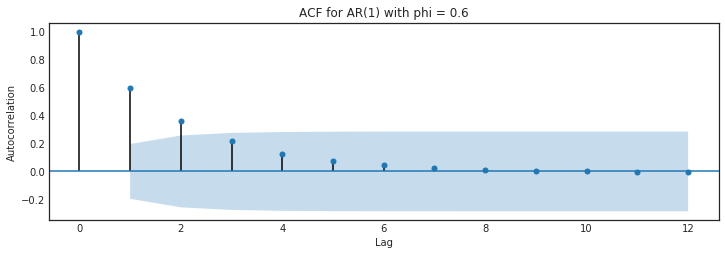

In [26]:
# First, let's create and AR(1) time series with phi = 0.6.
values = np.zeros(100)
values[0] = np.random.rand()

for i in range(1, 100):
    values[i] = 0.6*values[i - 1]

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(values, lags=12, ax=ax1)

plt.title("ACF for AR(1) with phi = 0.6")
plt.ylabel("Autocorrelation")
plt.xlabel("Lag")
plt.show()

The ACF of an AR(1) with $\phi_1 = -0.7$ is shown below. Note the alternating and tapering pattern.

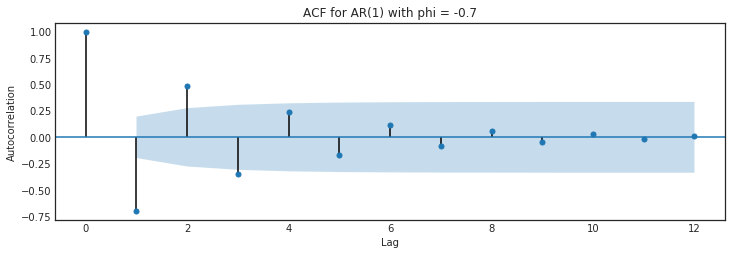

In [30]:
# Now, let's create and AR(1) time series with phi = -0.7
values = np.zeros(100)
values[0] = np.random.rand()

for i in range(1, 100):
    values[i] = -0.7*values[i - 1]

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(values, lags=12, ax=ax1)

plt.title("ACF for AR(1) with phi = -0.7")
plt.ylabel("Autocorrelation")
plt.xlabel("Lag")
plt.show()

## Example 1
In Example 1 of Lesson 1.1, we used an AR(1) model for annual earthquakes in the world with seismic magnitude greater than 7.0. Here's the sample ACF of the series:

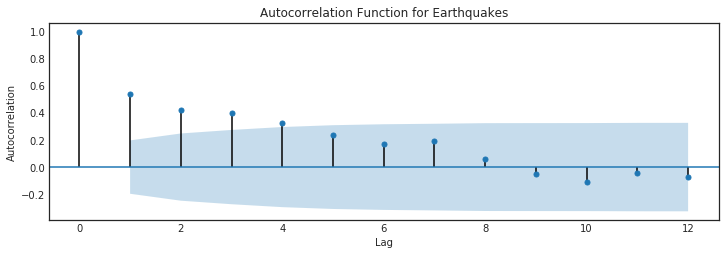

array([ 1.        ,  0.54173285,  0.41888438,  0.39795532,  0.32404731,
        0.23716419,  0.17179424,  0.19022816,  0.06120181, -0.04850548,
       -0.10673042, -0.04327143, -0.07230482, -0.12612397, -0.14431382,
       -0.12965267, -0.18790106, -0.09855827, -0.06743645,  0.02772472,
       -0.03228013, -0.03446259,  0.01384281, -0.08732251, -0.04958906,
        0.03976936,  0.10879469,  0.03528916,  0.02949805, -0.01011119,
        0.04793971,  0.02474034,  0.0758123 ,  0.07539411,  0.03785393,
       -0.03063036, -0.07084723, -0.04010835, -0.11109544, -0.09810478,
       -0.13255016])

In [100]:
quakes = pd.read_csv("../data/quakes.csv")
idx = pd.to_datetime(quakes['Index'])
quakes['Index'] = idx

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(quakes['Earthquakes'], lags=12, ax=ax1)

plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function for Earthquakes")
plt.show()

sm.tsa.acf(quakes['Earthquakes'])

The sample autocorrelations taper, although not as fast as they should for an AR(1). For instance, theoretically the lag 2 autocorrelation for an AR(1) is the square of the lag 1 autocorrelation. Here, the observed lag 2 autocorrelation is $0.41888$, which is somewhat greater than the square of the lag 1 autocorrelation $0.54173$. This brings up an important point: the sample ACF will rarely fit a perfect theoretical pattern. You often have to try a few models and see what fits.

We'll study the ACF patterns of other ARIMA models during the next few lectures. Each model has a different pattern for its ACF, but in practice, the interpretation of a sample ACF is not always so clear-cut.

**Reminder** Residuals usually are theoretically assumed to have an ACF that has correlation 0 for all lags.

## Example 2
Below is a time series of the weekly cardiovascular mortality rate in Los Angeles County, between 1970 and 1979.

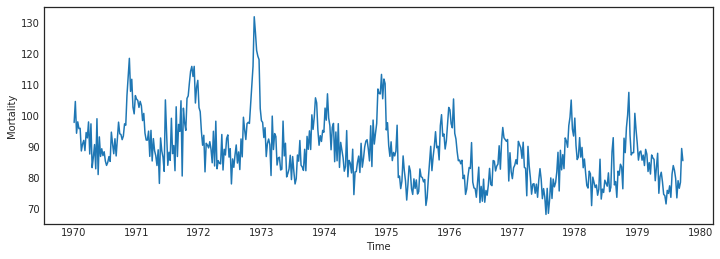

In [80]:
mortality = pd.read_csv("../data/mortality.csv")
idx = pd.to_datetime(mortality['Index'])
mortality['Index'] = idx

plt.figure(figsize=(12, 4))

plt.plot(idx,
         mortality['Mortality'],
         label="Mortality")

plt.xlabel("Time")
plt.ylabel("Mortality")
plt.show()

There is a slight downward trend, so the series may not be stationary. To create a (possibly) stationary series, we'll examine the **first differences** $y_t = x_t - x_{t - 1}$. This is a common time series method for creating a de-trended series and thus potentially a stationary series. Think about a straight line - there are constant differences in $y$ for each unit change of $x$.

The time series plot of the first differences is below.

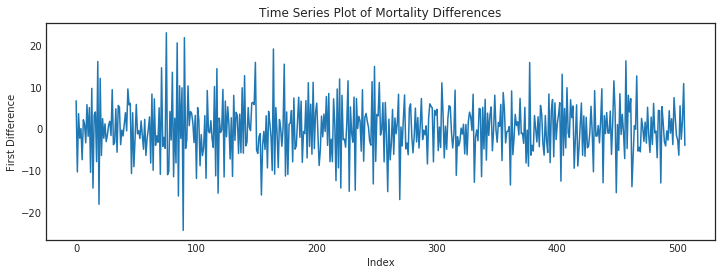

In [95]:
mortality_values = mortality['Mortality'].values
mortality_diff = mortality_values[1:] - mortality_values[:-1]

plt.figure(figsize=(12, 4))

plt.plot(mortality_diff)

plt.xlabel("Index")
plt.ylabel("First Difference")
plt.title("Time Series Plot of Mortality Differences")

plt.show()

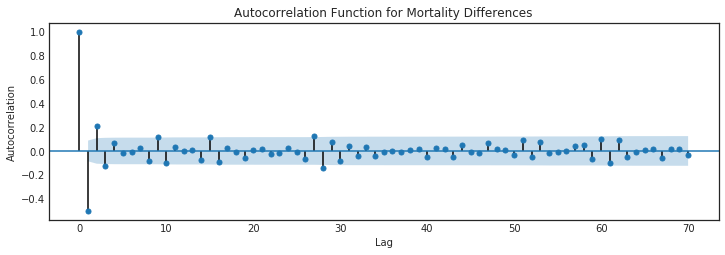

array([ 1.        , -0.50602924,  0.20510029, -0.1261103 ,  0.06247643,
       -0.01519025, -0.0068054 ,  0.02416682, -0.08734772,  0.11720159,
       -0.09844862,  0.0367927 ,  0.0022289 ,  0.00555116, -0.07285519,
        0.11668802, -0.08925218,  0.02198492, -0.00520001, -0.05591512,
        0.00717833,  0.0145507 , -0.02652444, -0.02049378,  0.02688448,
       -0.00556067, -0.0706714 ,  0.12536619, -0.14290334,  0.07776543,
       -0.08428111,  0.04188997, -0.03836321,  0.03321194, -0.0438903 ,
       -0.00713969, -0.00198174, -0.01310805,  0.00434614,  0.01245966,
       -0.05347092])

In [103]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)

sm.tsa.graphics.plot_acf(mortality_diff, lags=70, ax=ax1)

plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Function for Mortality Differences")
plt.show()

sm.tsa.acf(mortality_diff)

This looks like the pattern of an AR(1) with a negative lag 1 autocorrelation. Note that the lag 2 correlation is roughly equal to the squared value of the lag 1 correlation. The lag 3 correlation is nearly exactly equal to the cubed value of the lag 1 correlation, and the lag 4 correlation nearly equals the fourth power of the lag 1 correlation. Thus an AR(1) model may be a suitable model for the first differences $y_t = x_t - x_{t - 1}$.

Let $y_t$ denote the first differences, so that $y_t = x_t - x_{t - 1}$ and $y_{t - 1} = x_{t - 1} - x_{t - 2}$. We can write this AR(1) model as

\begin{equation*}
    y_t = \delta + \phi_1 y_{t - 1} + w_t.
\end{equation*}

Below, we find the AR(1) model for the mortality first-difference data:

In [139]:
diff_model = sm.tsa.AR(mortality_diff)
diff_result = diff_model.fit(maxlag=1)

diff_result.params

array([-0.04627191, -0.50636426])

This shows that the estimated model is

\begin{equation}
    \hat{y}_t = -0.04627 - 0.50636 y_{t - 1}.
\end{equation}

## Derivations of Properties of AR(1) Model
### Mean
Using the model $x_t = \delta + \phi_1 x_{t - 1} + w_t$, we see that

\begin{align}
    \E(x_t) &= \E(\delta + \phi_1 x_{t - 1} + w_t) \\
            &= \E(\delta) + \E(\phi_1 x_{t - 1}) + \E(w_t) \\
            &= \delta + \phi_1 \E(x_{t - 1}) + 0,
\end{align}

where we used the linearity of expectation and the fact that $\E(w_t) = 0$. With the stationarity assumption, $\E(x_t) = \E(x_{t - 1})$. Letting $\mu$ denote this common mean, we have $\mu = \delta + \phi_1 \mu$. Solving this for $\mu$ gives

\begin{equation}
    \mu = \frac{\delta}{1 - \phi_1}.
\end{equation}

### Variance
Under the assumption that the errors $w_t$ are independent of $x_t$, we get

\begin{align}
    \var(x_t) &= \var(\delta) + \var(\phi_1 x_{t - 1}) + \var(w_t) \\
              &= \phi_1^2 \var(x_{t - 1}) + \sigma_w^2.
\end{align}

By the stationarity assumption, $\var(x_t) = \var(x_{t - 1})$. Solving for $\var(x_t)$ gives $(1 - \phi_1^2) \var(x_t) = \sigma_w^2$. Since $\var(x_t) > 0$, this gives $1 - \phi_1^2 > 0$, and thus $\lvert \phi_1 \rvert < 1$.

### Autocorrelation Function (ACF)
To start, assume the data have mean 0, which happens when $\delta = 0$, and $x_t = \phi_1 x_{t - 1} + w_t$. In practice this isn't necessary, but it simplifies matters. Values of variances, covariances, and correlations are not affected by specific values of the mean.

Let $\gamma_h = \E(x_t x_{t + h}) = \E(x_t x_{t - h})$, the covariance observations $h$ time periods apart. Let $\rho_h$ denote the correlation between observations that are $h$ time periods apart.

First, observe that

\begin{align}
    \gamma_1 &= \E(x_t x_{t + 1}) \\
             &= \E(x_t (\phi_1 x_t + w_{t + 1})) \\
             &= \E(\phi_1 x_t^2 + x_t w_{t + 1}) \\
             &= \phi_1 \var(x_t),
\end{align}

and

\begin{align}
    \rho_1 &= \frac{\cov(x_t, x_{t + 1})}{\var(x_t)} \\
           &= \frac{\phi_1 \var(x_t)}{\var(x_t)} \\
           &= \phi_1.
\end{align}

Next, multiply each side of the model for $x_t$ by $x_{t - h}$, then take expectations. We get

\begin{equation}
    x_{t - h} x_t = \phi_1 x_{t - h} x_{t - 1} + x_{t - h} w_t
\end{equation}

so that

\begin{equation}
    \E(x_{t - h} x_t) = \E(\phi_1 x_{t - h} x_{t - 1}) + \E(x_{t - h} w_t)
\end{equation}

and thus

\begin{equation}
    \gamma_h = \phi_1 \gamma_{h - 1}.
\end{equation}

Using the fact that $\gamma_0 = \var(x_t), this gives

\begin{equation}
    \rho_h = \phi_1^h,
\end{equation}
as desired.